# Lista 06 - Fundamentos Estatísticos para Ciência dos Dados A
- Aluno: Thiago Martin Poppe
- Matrícula: 2017014324

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt

- **Nota:** para as questões relacionadas com o teste qui-quadrado, utilizei a função `stats.chisquare` do scipy para o cálculo da estatística. Nela, podemos passar o parâmetro `ddof`, que é o valor referente ao número de parâmetros estimados no modelo. Esse valor é usado no cálculo do p-valor através de uma distribuição $\chi^2$ com $k - 1 - ddof$ graus de liberdade, onde $k$ é o número de valores observados (número de categorias).

# Questão 10)
- Para verificar sua compreensão do problema, obtenha os números esperados que estão na Tabela 3.1.


- **Resposta:** eles representam a linha denotada por ESP, com os seguintes valores:
$$ \text{ESP: \{165.22, 1401.69, 5202.65, 11034.65, 14627.60, 12409.87, 6580.24, 1993.78, 264.30\}} $$


- Calcule a estatística qui-quadrado neste problema (você deve obter um valor de $\chi^2 = 91.87$).

In [2]:
observed_values = np.array([215, 1485, 5331, 10649, 14959, 11929, 6678, 2092, 342])
expected_values = np.array([165.22, 1401.69, 5202.65, 11034.65, 14627.60, 12409.87, 6580.24, 1993.78, 264.30])

# No caso, como estamos utilizando uma binomial, iremos estimar 2 parâmetros
chi_square_test = ss.chisquare(observed_values, expected_values, ddof=2)
print('Estatística qui-quadrado = {:.2f}'.format(chi_square_test.statistic))

Estatística qui-quadrado = 91.87


- Qual a distribuição de referência desta estatística?


- **Resposta:** a estatística qui-quadrado possui como referência a distribuição $\chi^2$.



- Qual o p-valor associado com esta estatística?
    - DICA: use `pchisq` para obter o p-valor igual a 0.0 (numa aproximação até 15 casas decimais).

In [3]:
print('p-valor associado = {}'.format(chi_square_test.pvalue))

p-valor associado = 1.238663081002473e-17


# Questão 19)

- Explique como a equação (3.2) $\mathbb P(Y=k) = \frac{c}{k^\theta}$ implicaria que *the frequency of any word is inversely proportional to its rank*.


- **Resposta:** Como mencionado no texto da questão, probabilidades são aproximadamente frequências relativas, onde nesse caso $\mathbb P(Y = k) \approx \frac{n_k}{10^6}$. Com a leitura do texto, definimos $k$ (valor de *rank*) como os possíveis valores da variável aleatória $Y$. Com isso, através da equação (3.2), teremos que a frequência de qualquer palavra será inversamente proporcional ao seu rank: $\mathbb P(Y=k) = \textit{frequency} \propto \frac{1}{k}$, note que $c$ e $\theta$ são constantes!

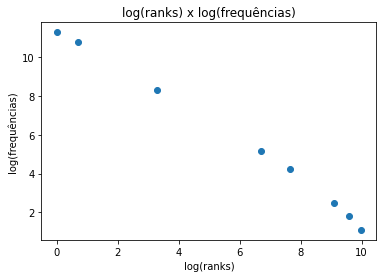

In [4]:
ranks = np.array([1, 2, 27, 802, 2087, 8901, 14343, 21531])
frequencies = np.array([79607, 48238, 4033, 174, 70, 12, 6, 3])

plt.title('log(ranks) x log(frequências)')
plt.xlabel('log(ranks)')
plt.ylabel('log(frequências)')
plt.scatter(np.log(ranks), np.log(frequencies))
plt.show()

In [5]:
linear_regression = ss.linregress(np.log(ranks), np.log(frequencies))
print('Inclinação = {:.3f}'.format(linear_regression.slope))

Inclinação = -0.999


 # Questão 30)

- Estime $\mathbb E(Y)$ usando a média aritmética $\bar{X} + 1$ e obtenha assim uma estimativa de $\theta$.


- **Resposta:** Ao estimarmos o valor da esperança através da média aritmética +1, teremos que $\mathbb E(Y) = \mathbb E(X) + 1 = \frac{537}{576} + 1 \approx 0.9323 + 1$. Tendo em mãos o valor da esperança da variável aleatória $Y$, nós conseguimos estimar o valor de $\theta$ resolvendo a equação não linear $\mathbb E(Y) = \frac{-1}{\log(1-\theta)}*\frac{\theta}{1-\theta}$. Para resolver esse problema, optei por variar o valor de $\theta$ no intervalo $(0,1)$ e guardar o valor que faz com que a esperança teórica se aproxime mais do valor computado anteriormente com os dados.

In [6]:
E_y = lambda theta: (-1 / (np.log(1-theta)) * (theta / (1-theta)))

diff = np.inf
best_theta = 0.01

for theta in np.arange(0.01, 1, 0.0001):
    expected_value = E_y(theta)
    new_diff = np.abs(1.9323 - expected_value)
    
    if new_diff < diff:
        diff = new_diff
        best_theta = theta

print('O melhor valor de theta encontrado foi {:.5f}'.format(best_theta))
print('Gerando o valor E(Y) = {:.5f}'.format(E_y(best_theta)))

O melhor valor de theta encontrado foi 0.69850
Gerando o valor E(Y) = 1.93226


- Calcule os valores esperados do número de quadrados com $k$ bombas. Por exemplo, o número esperado com 0 bombas é dado por

$$576 * \mathbb P(X = 0) = 576 * \mathbb P(Y = 1) = \frac{-1}{log(1 - \hat{\theta})}\frac{\hat{\theta}^1}{1} = 576 * 0.585 = 336.96$$

In [7]:
def P_y(k):
    return (-1 / np.log(1 - best_theta)) * ((best_theta**k) / k)

expected_values = np.zeros(6)

for i in range(0, 5):
    expected_values[i] = 576 * P_y(i+1)
    
expected_values[5] = 576 * (1 - (P_y(1) + P_y(2) + P_y(3) + P_y(4) + P_y(5)))

print('Valores esperados usando theta = {:.5f}:'.format(best_theta))
print(expected_values)

Valores esperados usando theta = 0.69850:
[335.56375752 117.19564231  54.5741041   28.59000879  15.97609691
  24.10039037]


- Embora seja óbvio que a distribuição logarítimica não se ajusta a estes dados, calcule a estatística qui-quadrado a partir das diferenças entre os valores observados e esperados.

In [8]:
observed_values = np.array([229, 211, 93, 35, 7, 1])

# No caso, como estamos utilizando uma distribuição logarítmica, iremos estimar 1 parâmetro
chi_square_test = ss.chisquare(observed_values, expected_values, ddof=1)
print('Estatística qui-quadrado = {:.2f}'.format(chi_square_test.statistic))

Estatística qui-quadrado = 164.60


- Obtenha o p-valor associado com a estatística.

In [9]:
print('p-valor associado = {}'.format(chi_square_test.pvalue))

p-valor associado = 1.5066519992287076e-34


# Questão 33)

- Vamos usar a desigualdade de Tchebychev abaixo para gerar um intervalo de predição para $X$.
$$
\mathbb P\left(\left| \frac{X - \mu}{\sigma} \right| \geq \delta \right) \leq \frac{1}{\delta^2}
$$


- Suponha que $X$ possua uma distribuição de probabilidade arbitrária com $\mathbb E(X) = \mu = 120$ e $\text{Var}(X) = \sigma^2 = 10^2$. Usando a desiguadade de Tchebychev, mostre que o intervalo $(120 \pm 45) = (75, 165)$ deverá conter pelo menos 95% dos dados gerados de $X$, qualquer que seja a distribuição de $X$.


- **Resposta:** Note que o intervalo $(75, 165)$ corresponde à um desvio de $4.5\sigma$ do valor da esperança, fazendo com que o valor de $\delta$ seja 4.5, nesse caso. Aplicando a desigualdade de Tchebychev, podemos observar que a probabilidade de um valor estar em um intervalo maior do que $4.5\sigma$, com relação ao valor esperado, será menor que $\frac{1}{4.5^2} = \frac{1}{20.25} \approx 0.04938$. Sendo assim, o intervalo $(75, 165)$ deverá conter **pelo menos** 95% dos dados gerados de $X$ (para qualquer que seja a distribuição de $X$).

- Suponha agora que sabemos algo mais sobre a distribuição de $X$. Este conhecimento adicional reduz substancialmente a incerteza acerca dos valores gerados da distribuição. Agora, usando o comando `qnorm` do R, mostre que o intervalo que conterá 95% dos valores de uma amostra de $X$ é $(120 \pm 1.96 ∗ 10) = (100.4, 139.6)$.

In [10]:
# Para obtermos a probabilidade de um valor cair no intervalo
# (a, b), basta realizarmos F(b) - F(a)

Fx = ss.norm(120, 10).cdf
print('Probabilidade de um valor cair no intervalo = {:.5f}'.format(Fx(139.6) - Fx(100.4)))

Probabilidade de um valor cair no intervalo = 0.95000
